<a href="https://colab.research.google.com/github/Alexiane-lc/dairy_book/blob/main/Practice_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECAS-SFdS course on Textmining -- Practice Lab 1

**Aim:** to see basic concepts of text representation 

**Roadmap**

1. Data acquisition and loading
2. Representation 
3. Summaries


In [ ]:
# Some basics (for recall purpouses)
text = 'This short pharse is a character string.'

print("First index at 0 :" + text[0])   
print("Subsetting : " + text[1:5])  # subsetting

start = text.find('character')

print("Where 'character' starts : " + str(start))
print("Subsetting around the word 'character' : " + text[start-5:start+5])

First index at 0 :T
Subsetting : his 
Where 'character' starts : 23
Subsetting around the word 'character' : is a chara


## Data Acquisition

Text can come from different sources and in different shapes :

- handwritten notes
- scanned documents
- digitally native 
  - documents, mails, ... 
  - web pages (articles, blogs, )
  - social media

### Handwritten documents

--2021-10-11 16:02:00--  https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/sample-docs/handwritten-note.jpg?inline=false
Resolving git.msh-lse.fr (git.msh-lse.fr)... 193.48.145.15
Connecting to git.msh-lse.fr (git.msh-lse.fr)|193.48.145.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241601 (236K) [image/jpeg]
Saving to: ‘handwritten-note.jpg’

handwritten-note.jp 100%[===================>] 235.94K   235KB/s    in 1.0s    

2021-10-11 16:02:02 (235 KB/s) - ‘handwritten-note.jpg’ saved [241601/241601]



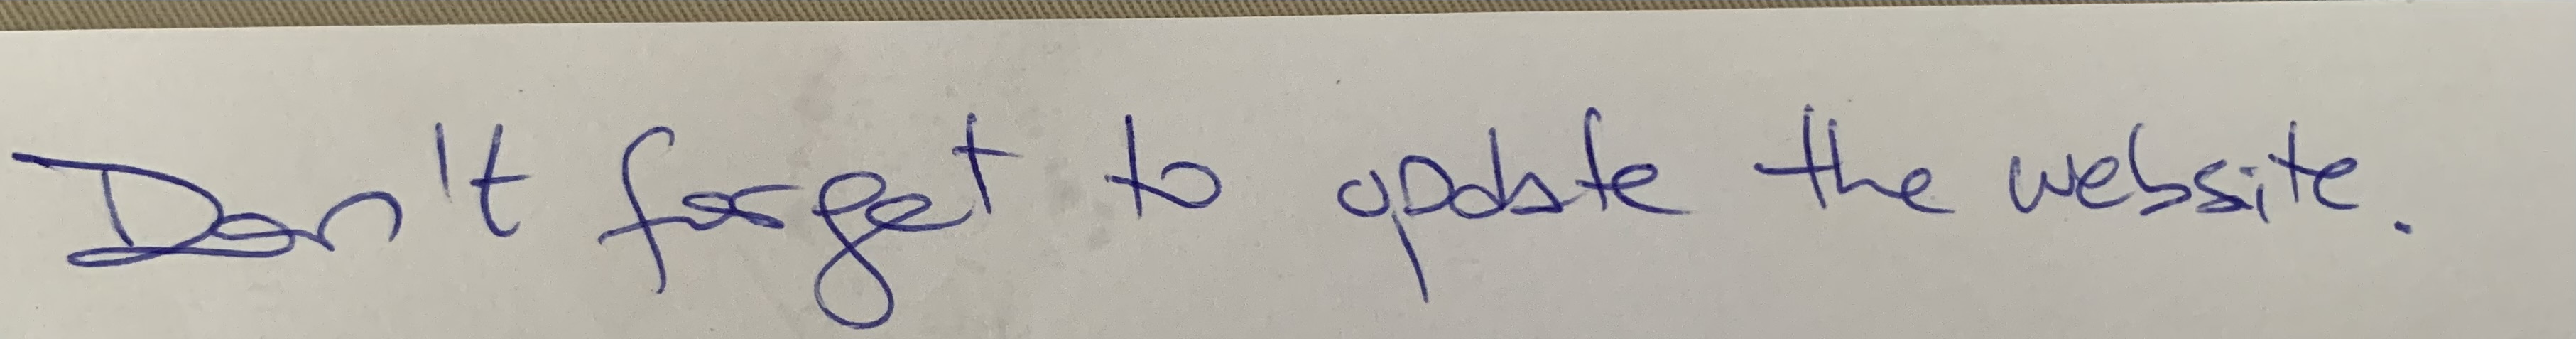

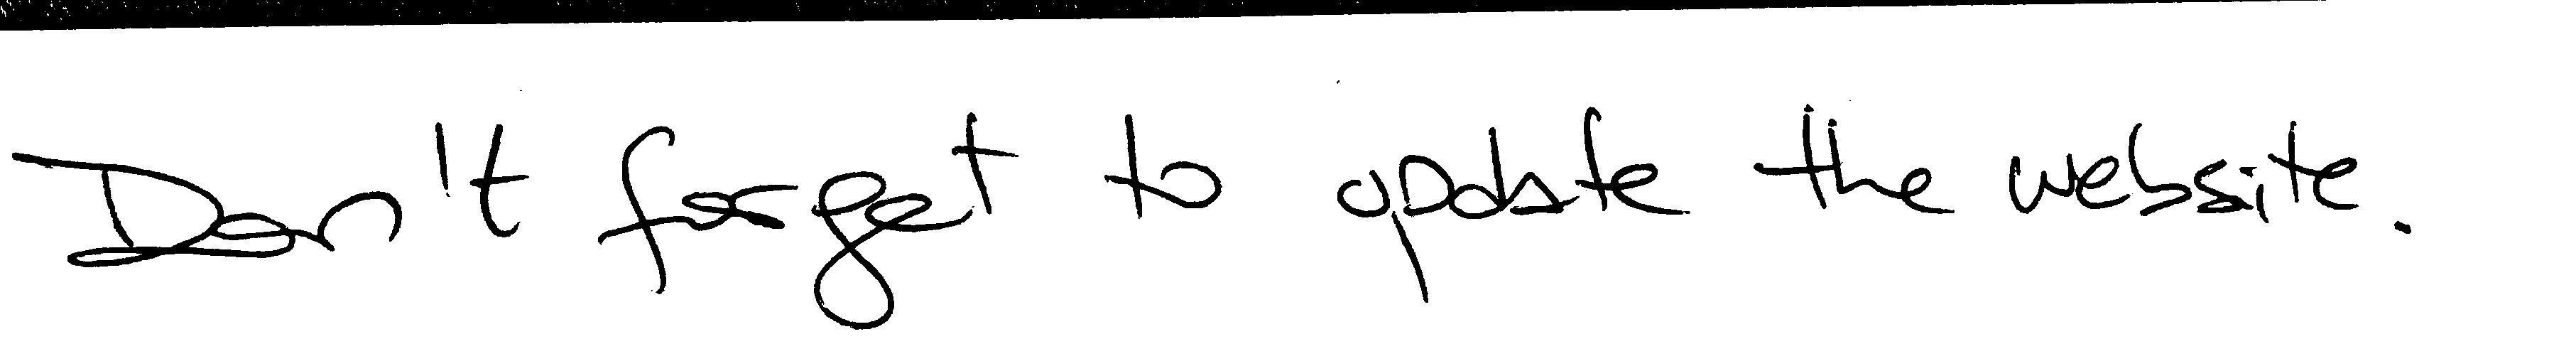

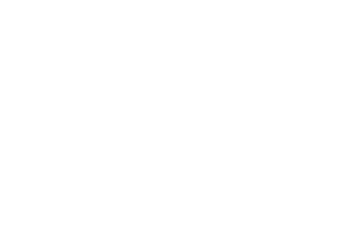

In [71]:
!wget -O handwritten-note.jpg https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/sample-docs/handwritten-note.jpg?inline=false
#wget is not python - il apparait ensuite dans la barre sur le cote gauche
import cv2 #open images and videos
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #display image

image = cv2.imread("handwritten-note.jpg") #the image is read
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) #pour faire tourner l'image car pas dans le bon sens
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #image transformed into a scale of gray
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] #convert the image into 2 colors = black or white

plt.axis('off')

cv2_imshow(image)
cv2_imshow(gray)

# provides preprocessed image

In [72]:
# Setup
!sudo apt-get install tesseract-ocr #apt-get linked to linux
!pip install pytesseract
import pytesseract
from pytesseract import Output

#par defaut, il installe seulement le package pour l'anglais, pour d'autre langues il faut réinstaller des packages

# More information about tesseract-ocr : https://github.com/madmaze/pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [73]:
d = pytesseract.image_to_string(gray, output_type=Output.DICT)
print(d['text'])

print(pytesseract.image_to_boxes(gray))

po lt focges to opdate the website,

p 17 101 272 263 0
o 3627 0 3627 0 0
l 3627 0 3627 0 0
t 613 143 745 305 0
f 842 63 960 300 0
o 960 63 1021 300 0
c 1021 63 1082 300 0
g 1082 63 1124 300 0
e 1189 13 1280 236 0
s 1340 175 1434 319 0
t 1555 169 1629 316 0
o 1629 169 1721 316 0
o 1883 171 1917 238 0
p 1917 171 1957 238 0
d 2009 51 2087 298 0
a 2087 51 2192 298 0
t 2192 51 2224 298 0
e 2257 175 2380 327 0
t 2469 176 2558 331 0
h 2558 176 2637 331 0
e 2637 176 2752 331 0
w 2829 176 2911 261 0
e 2911 176 2964 261 0
b 2964 176 3000 261 0
s 3016 173 3086 304 0
i 3121 177 3173 253 0
t 3176 163 3195 218 0
e 3225 182 3291 307 0
, 3371 148 3395 166 0



**Test avec mon image**

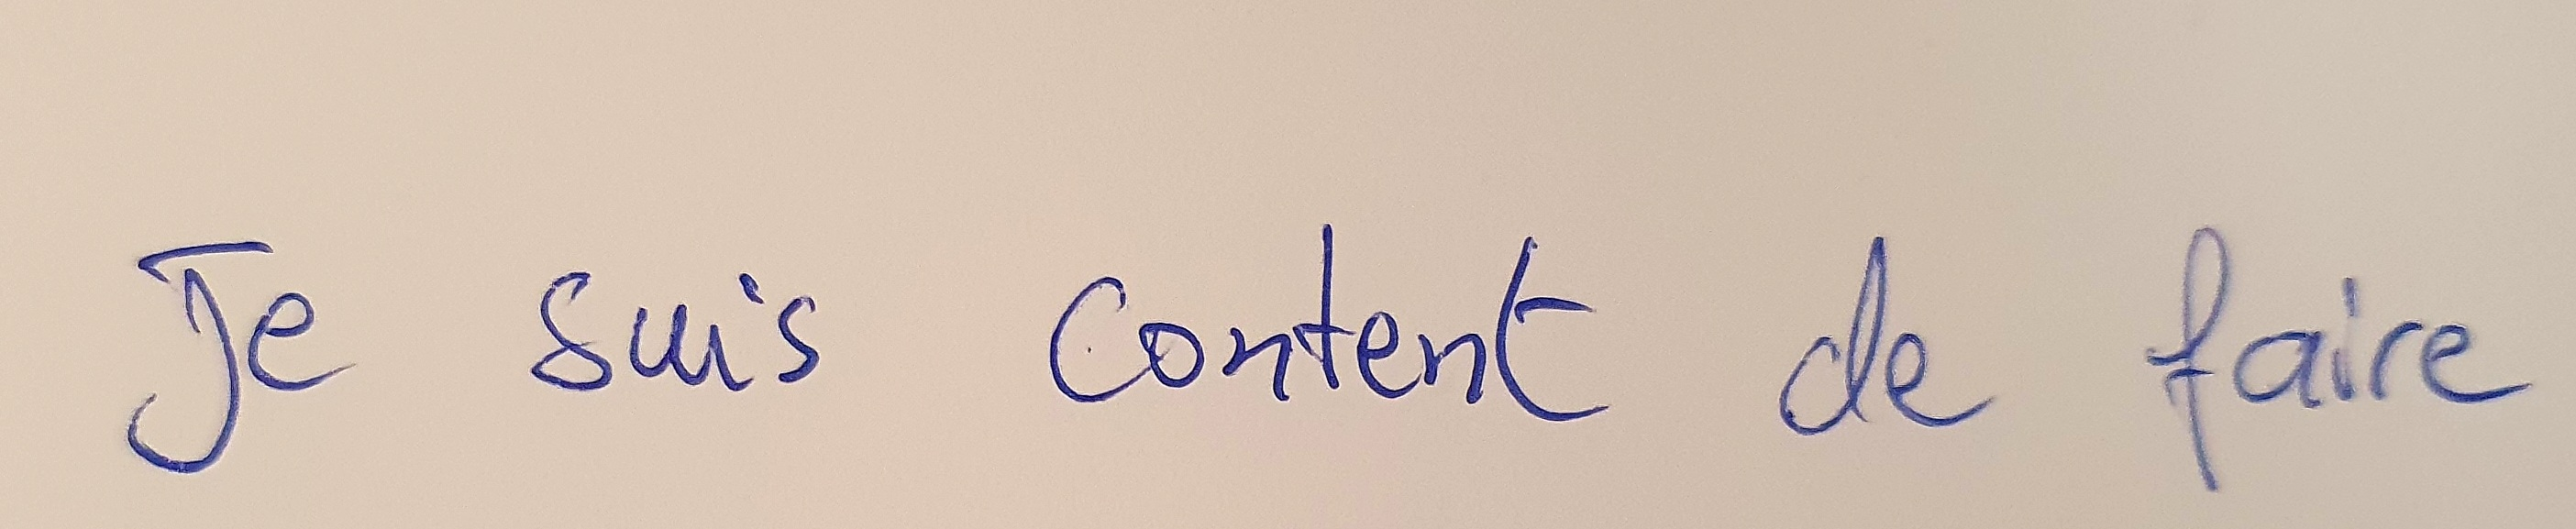

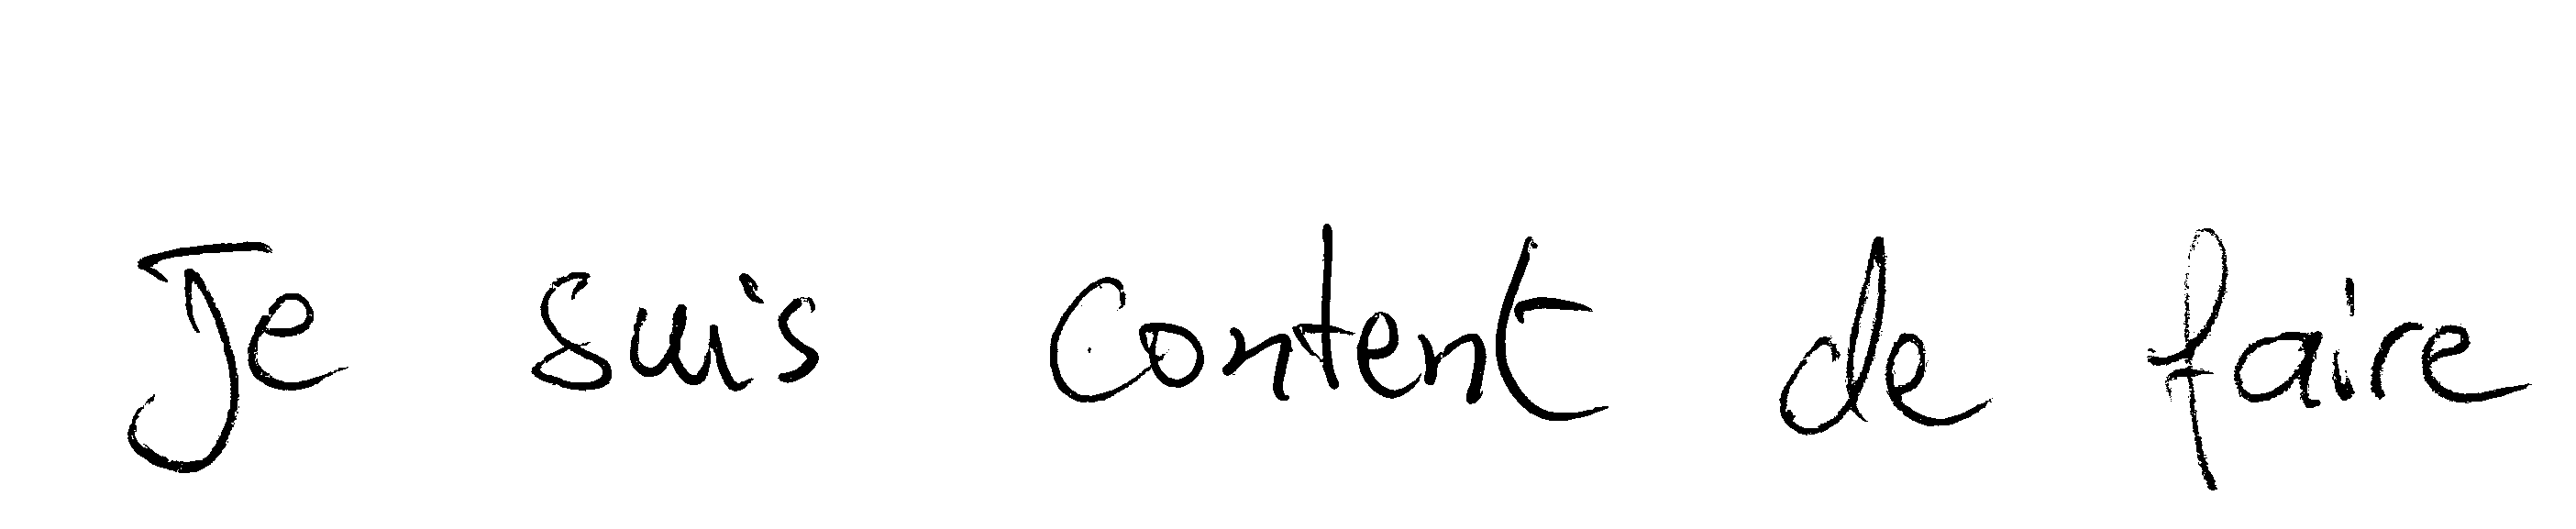

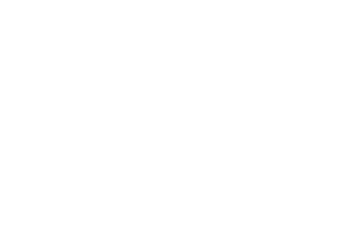

In [83]:
#!wget -O /content/IMG_20211011_165743__01.jpg #faire glisser l'image dans la barre à gauche
#wget is not python - il apparait ensuite dans la barre sur le cote gauche
#import cv2 #open images and videos
#import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow #display image

image = cv2.imread("20211011_170857.jpg") #the image is read
#image = cv2.imread("IMG_20211011_172036.jpg")
#image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) #pour faire tourner l'image car pas dans le bon sens
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #image transformed into a scale of gray
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] #convert the image into 2 colors = black or white

# Remove horizontal lines
#horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
#remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
#cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#for c in cnts:
#   cv2.drawContours(thresh, [c], -1, (255,255,255), 5)

plt.axis('off')

cv2_imshow(image)
cv2_imshow(gray)

In [81]:
!sudo apt-get install tesseract-ocr tesseract-ocr-fra #apt-get linked to linux
!pip install pytesseract
import pytesseract
from pytesseract import Output

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr-fra is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [84]:
d = pytesseract.image_to_string(gray, output_type=Output.DICT, lang="fra")
print(d['text'])

print(pytesseract.image_to_boxes(gray))

ve Suis Content cle Jare

N 139 61 255 314 0
e 270 151 380 257 0
S 579 150 667 280 0
w 687 150 770 279 0
' 770 150 832 279 0
s 848 159 893 253 0
C 1145 138 1213 275 0
o 1213 138 1295 275 0
n 1333 140 1388 220 0
t 1409 152 1449 333 0
e 1449 152 1478 333 0
n 1511 136 1604 237 0
t 1631 118 1754 319 0
o 1940 102 1976 319 0
l 1976 102 2016 319 0
e 2055 112 2172 214 0
f 2341 42 2398 328 0
a 2436 132 2508 216 0
c 2543 140 2619 274 0
e 2640 137 2761 223 0



### Digitally native documents

In [43]:
!pip install PyPDF2  # Install extra module
import PyPDF2       # Load module
from PyPDF2 import PdfFileReader

# Open with your browser the link below
!wget "https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20210803.pdf" #le ! est car on est en dehors de python
FILE = "20210803.pdf"

     |████████████████████████████████| 77 kB 2.2 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=068204bb0f998970fae16e6ff4658c689a9ffd7394f63624e39055ed3abe1ec6
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
--2021-10-11 15:31:58--  https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20210803.pdf
Resolving donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)... 137.129.43.49
Connecting to donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)|137.129.43.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2972333 (2.8M) [application/pdf]
Saving to: ‘20210803.pdf’

20210803.pdf        100%[===================>]   2.83M   246KB/s    in 16s     

2021-10-11 15:32:16 (177 KB/s) - ‘20210803.pdf’ saved [2972333/2972333]



In [ ]:
# Quite uninteresting informations
with open(FILE, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        print(information)
    
pdfFileObject = open(FILE, 'rb')            # PDF Object
pdfReader = PyPDF2.PdfFileReader(pdfFileObject) # PDF reader object

text='' #information from the different pages
for i in range(0,pdfReader.numPages):
    # creating a page object
    pageObj = pdfReader.getPage(i)
    # extracting text from page
    text=text+pageObj.extractText()

print("\n--------------- Exraction ---------------\n")
print(text) 

In [ ]:
import re
clean_txt = re.sub("™", "'", text)
text


### Your turn 

Try to load the daily weather report from Met Office UK using this link

https://digital.nmla.metoffice.gov.uk/download/file/IO_8399517f-6890-44b7-8a48-e2880f78d511



In [63]:
# url : https://digital.nmla.metoffice.gov.uk/download/file/IO_8399517f-6890-44b7-8a48-e2880f78d511

!pip install PyPDF2  # Install extra module
import PyPDF2       # Load module
from PyPDF2 import PdfFileReader
FILE = "DWS_2020_01.pdf"

# Quite uninteresting informations
with open(FILE, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        print(information)
    
pdfFileObject = open(FILE, 'rb')            # PDF Object
pdfReader = PyPDF2.PdfFileReader(pdfFileObject) # PDF reader object

text='' #information from the different pages

for i in range(10,11):
    # creating a page object
    pageObj = pdfReader.getPage(i)
    # extracting text from page
    text=text+pageObj.extractText()

print("\n--------------- Extraction ---------------\n")

start = text.find('This day')
end = text.find('Daily Extremes')

print(text[start:end])

{'/Author': '<Met Office_Exeter>', '/CreationDate': 'D:20200218130054Z', '/Creator': 'PDFCreator 3.2.0.11758', '/Keywords': '', '/ModDate': 'D:20200218135331Z', '/Producer': 'PDFCreator 3.2.0.11758', '/Subject': '', '/Title': 'dws_01-2020_for_print'}

--------------- Extraction ---------------

This day's summary created 09/01/2020 02:00 
Summary of the UK Weather for Thursday 02 January 2020 
A cloudy night for most, with some clear spells developing at times, particularly over northern 
England. A southerly wind throughout with some gustiness over Scotland, Northern Ireland, 
and the north of England and Wales. A band of rain approached from the west over Northern 
Ireland and Scotland in the early hours. The band of rain pushed into Northern Ireland and 
western Scotland during the morning, accompanied by gusty winds. Elsewhere was 
predominantly cloudy and mild for the time of year. By mid-afternoon afternoon, the band of 
rain had pushed away from Northern Ireland into northern En


## Representation

In [102]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download; download("stopwords")
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

with open("La_Bruna_2018.final.txt") as f:
    lines = [line.strip() for line in f.readlines()]

#tf_vectorizer = CountVectorizer() 
#tf_vectorizer = CountVectorizer(stop_words=['the','we','should','this','to','and','all','of','by','for','et','al']) 
tf_vectorizer = CountVectorizer(stop_words=stopwords.words("english")) 
tf_vectorizer.fit(lines)

X = tf_vectorizer.transform(lines)
X = X.toarray()
features = tf_vectorizer.get_feature_names()

(num_doc, num_f) = X.shape

print(X.shape)
print(features)
print(len(features))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
(201, 1332)
['000', '10', '100', '1000', '103', '10a', '10b', '11', '1100', '12', '120', '13', '130', '1300', '14', '14a', '14b', '14c', '14d', '14e', '15', '150', '170', '1895', '1955', '1957', '1962', '1963', '1965', '1969', '1971', '1972', '1973', '1975', '1980', '1981', '1982', '1983', '1985', '1986', '1987', '1988', '1988a', '1989', '1990', '1991', '1992', '1992a', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2015a', '2015b', '2016', '2017', '211', '25', '30', '300', '320', '35', '3d', '450', '50', '5a', '5b', '5c', '5d', '5g', '5h', '5m', '60', '600', '6a', '6b', '6h', '6l', '70', '7a', '7c', '7d', '80', '800', '90', '9a', '9b', 'abundance', 'abutting', 'accommodation', 'according', 'accordingly', 'account', 'accretionar

In [103]:
# Wordcloud : an oversimplified summary of the text 

cloud_labels = features #names of the columns

cloud_weights = np.sum(X, axis=0)                   # sum across lines to have the frequencies
dictionary = dict(zip(cloud_labels, cloud_weights)) # paste features names & weigths
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

[('al', 108), ('et', 108), ('fault', 108), ('messinian', 106), ('faults', 82), ('fig', 70), ('throw', 68), ('early', 53), ('alpi', 35), ('monte', 35), ('profile', 35), ('lower', 29), ('pre', 29), ('geometry', 28), ('set', 26), ('basin', 25), ('computed', 25), ('data', 22), ('carbonates', 21), ('cretaceous', 21), ('foreland', 21), ('profiles', 21), ('ca', 20), ('system', 20), ('post', 19), ('two', 18), ('shows', 17), ('values', 17), ('displacement', 16), ('geological', 16), ('network', 16), ('nw', 16), ('shaped', 16), ('stratigraphic', 16), ('structural', 16), ('whereas', 16), ('2000', 15), ('along', 15), ('area', 15), ('flat', 15), ('insert', 15), ('topped', 15), ('upper', 15), ('apulian', 14), ('sets', 14), ('southern', 14), ('surfaces', 14), ('1988', 13), ('1995', 13), ('2017', 13)]


In [104]:
from wordcloud import WordCloud

limit = 50
fontcolor='#afafaf'
bgcolor = '#000000'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary)

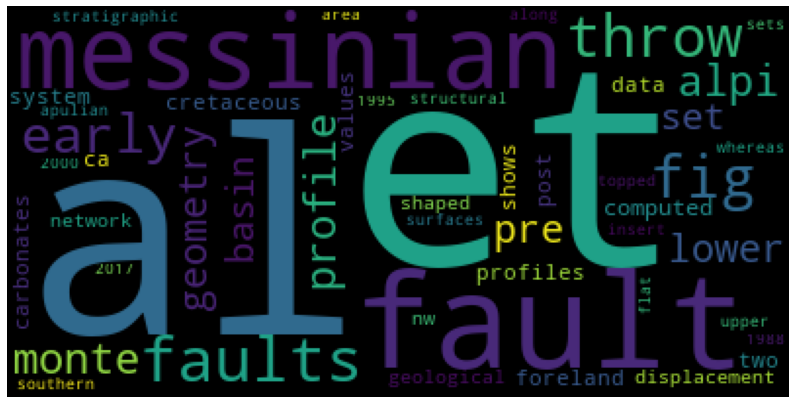

In [105]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Wordcloud"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [110]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download; download("stopwords")
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

with open("DWS_2020_01_page11.txt") as f:
    lines = [line.strip() for line in f.readlines()]

#tf_vectorizer = CountVectorizer() 
#tf_vectorizer = CountVectorizer(stop_words=['the','we','should','this','to','and','all','of','by','for','et','al']) 
tf_vectorizer = CountVectorizer(stop_words=stopwords.words("english")) 
tf_vectorizer.fit(lines)

X = tf_vectorizer.transform(lines)
X = X.toarray()
features = tf_vectorizer.get_feature_names()

(num_doc, num_f) = X.shape

print(X.shape)
print(features)
print(len(features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(11, 62)
['accompanied', 'afternoon', 'approached', 'away', 'band', 'batch', 'breezy', 'brought', 'clear', 'cloudy', 'conditions', 'developing', 'dry', 'earlier', 'early', 'east', 'elsewhere', 'england', 'evening', 'everywhere', 'falls', 'first', 'gradually', 'ground', 'gustiness', 'gusty', 'heavy', 'high', 'hours', 'hovering', 'intensity', 'ireland', 'losing', 'mid', 'mild', 'morning', 'mostly', 'night', 'north', 'northern', 'part', 'particularly', 'patchy', 'predominantly', 'pushed', 'rain', 'renewed', 'scotland', 'see', 'southerly', 'southern', 'spells', 'throughout', 'time', 'times', 'wales', 'west', 'western', 'wind', 'winds', 'would', 'year']
62


[('northern', 7), ('rain', 5), ('scotland', 5), ('band', 4), ('england', 4), ('ireland', 4), ('afternoon', 2), ('cloudy', 2), ('night', 2), ('pushed', 2), ('wales', 2), ('west', 2), ('western', 2), ('accompanied', 1), ('approached', 1), ('away', 1), ('batch', 1), ('breezy', 1), ('brought', 1), ('clear', 1), ('conditions', 1), ('developing', 1), ('dry', 1), ('earlier', 1), ('early', 1), ('east', 1), ('elsewhere', 1), ('evening', 1), ('everywhere', 1), ('falls', 1), ('first', 1), ('gradually', 1), ('ground', 1), ('gustiness', 1), ('gusty', 1), ('heavy', 1), ('high', 1), ('hours', 1), ('hovering', 1), ('intensity', 1), ('losing', 1), ('mid', 1), ('mild', 1), ('morning', 1), ('mostly', 1), ('north', 1), ('part', 1), ('particularly', 1), ('patchy', 1), ('predominantly', 1)]


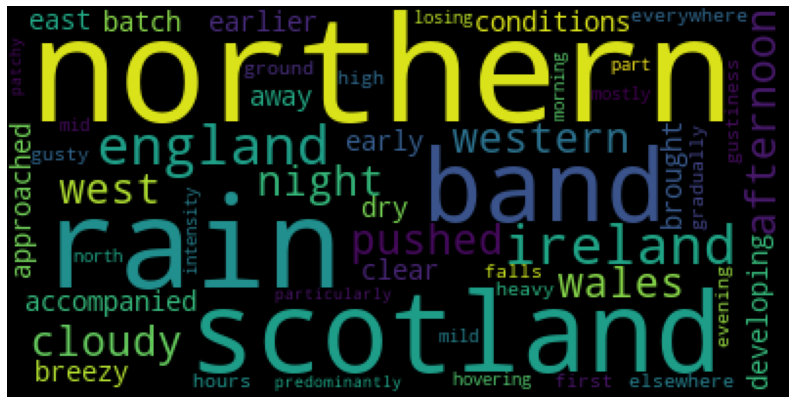

In [108]:
cloud_labels = features #names of the columns

cloud_weights = np.sum(X, axis=0)                   # sum across lines to have the frequencies
dictionary = dict(zip(cloud_labels, cloud_weights)) # paste features names & weigths
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

from wordcloud import WordCloud

limit = 50
fontcolor='#afafaf'
bgcolor = '#000000'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Wordcloud"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()